<a href="https://colab.research.google.com/github/mariapaulasedano15/mpss0315/blob/main/01_Exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/AlejandroMesa2/Costa-Rican-Household-Poverty-Level-Prediction/main/Datasets/test.csv'
url2 = 'https://raw.githubusercontent.com/AlejandroMesa2/Costa-Rican-Household-Poverty-Level-Prediction/main/Datasets/train.csv'
a = pd.read_csv(url)
b = pd.read_csv(url2)
train = b.copy()
test = a.copy()
df = pd.concat((train, test), ignore_index= True, sort = False)
df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.00,100.0000,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.00,144.0000,4489,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.00,121.0000,8464,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.00,121.0000,289,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.00,121.0000,1369,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33408,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,...,9,100,36,25,4,36.000000,0.25,33.0625,100,NaN
33409,ID_1a7c6953b,NaN,0,3,0,1,1,0,NaN,0,...,36,2916,16,36,4,4.000000,1.00,36.0000,2916,NaN
33410,ID_07dbb4be2,NaN,0,3,0,1,1,0,NaN,0,...,16,144,16,36,4,4.000000,1.00,36.0000,144,NaN
33411,ID_34d2ed046,NaN,0,3,0,1,1,0,NaN,0,...,25,144,16,36,4,4.000000,1.00,36.0000,144,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33413 entries, 0 to 33412
Columns: 143 entries, Id to Target
dtypes: float64(9), int64(129), object(5)
memory usage: 36.5+ MB


In [ ]:
df.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9.150000e+03,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,7945.000000,33413.000000,33413.000000,...,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33377.000000,33413.000000,9557.000000
mean,1.720308e+05,0.047077,4.955706,0.027055,0.993326,0.960464,0.237782,1.364003,0.407775,1.562595,...,74.384820,1653.786909,19.118966,53.919343,3.873851,3.474577,4.094081,101.104384,1653.786909,3.302292
std,1.550035e+05,0.211808,1.519659,0.162247,0.081423,0.194868,0.425731,0.714483,0.704245,1.003650,...,76.933222,1750.049285,17.737165,77.637447,6.898213,6.053864,12.939225,90.467735,1750.049285,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.350000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,1024.000000,16.000000,36.000000,1.000000,2.250000,0.444444,75.111115,1024.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000,4.000000
max,2.852700e+06,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,100.000000,169.000000,64.000000,1369.000000,9409.000000,4.000000


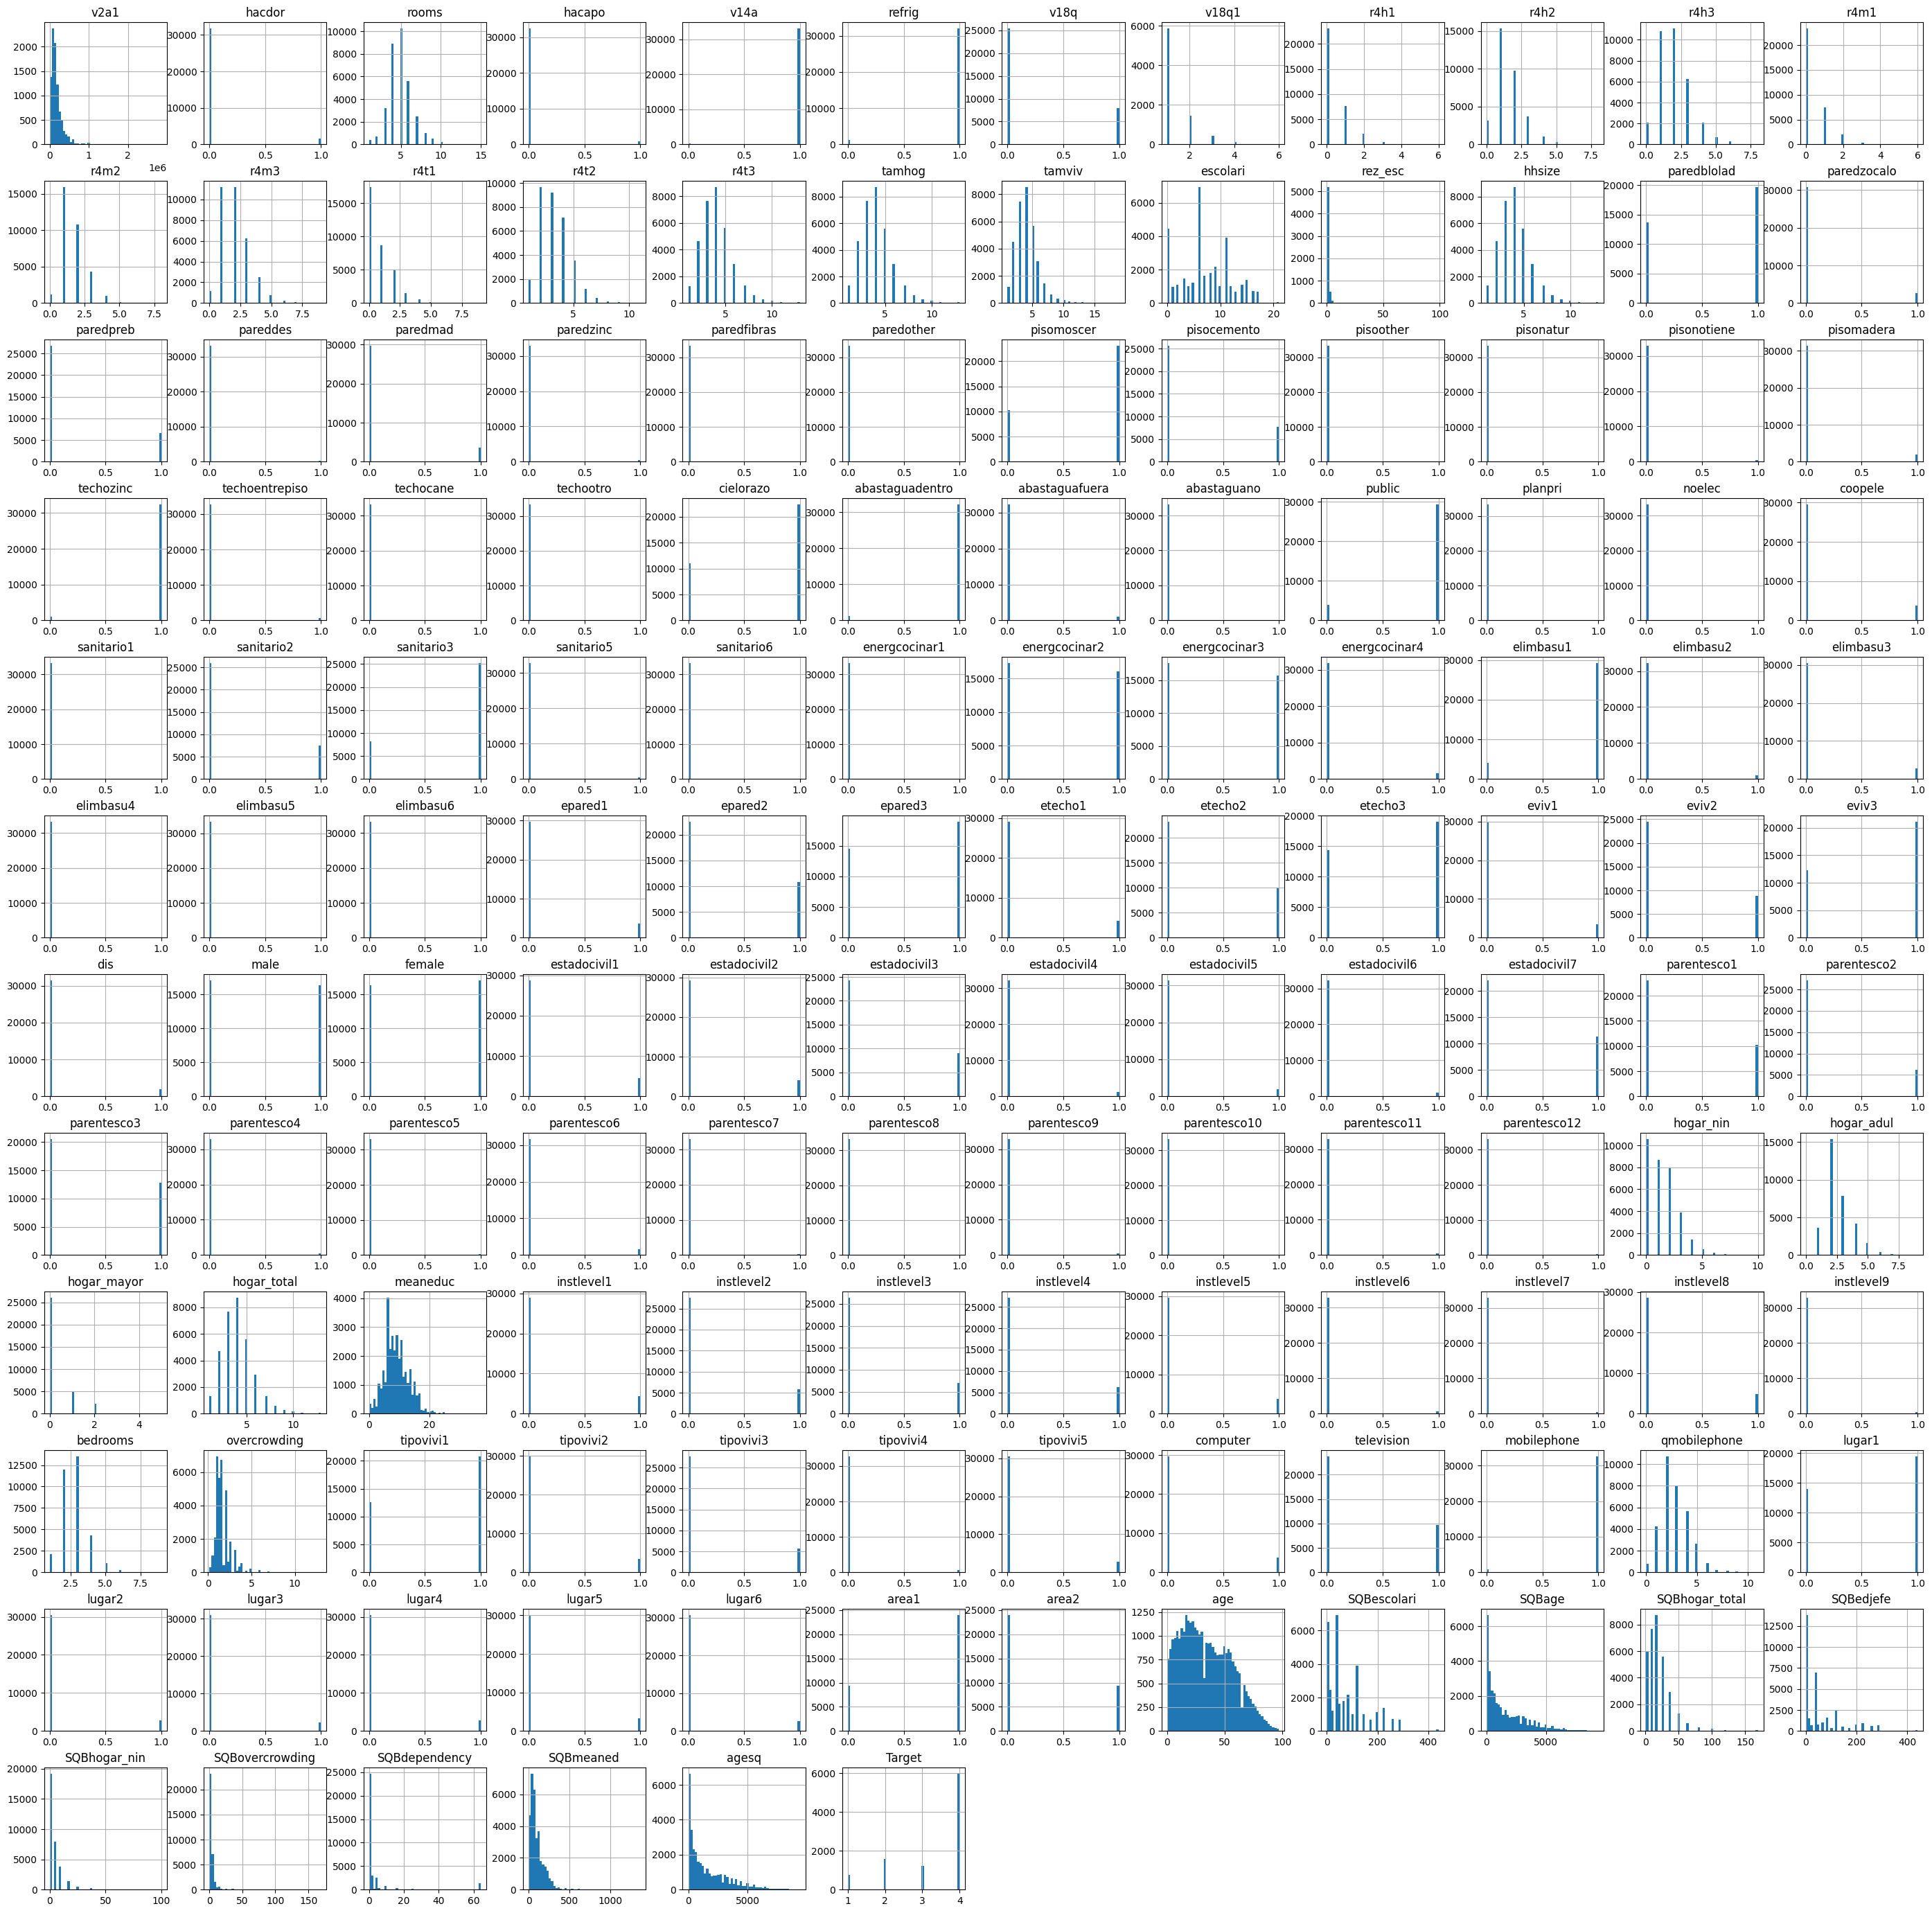

In [ ]:
df.hist(figsize = (35,35), bins = 50)
plt.show()

#Comprobando y ajustando condiciones del data set
- al menos ha de tener un 5% de datos faltantes en al menos el 3 columnas.
- al menos el 10% de las columnas han de ser categóricas


In [ ]:
list_na = df.columns[df.isna().any()].tolist()
print('Columnas con más del 5% de datos faltantes: ')
for i in list_na:
  if df[i].isna().sum()/len(df)>=0.05:
    print(i)


Columnas con más del 5% de datos faltantes: 
v2a1
v18q1
rez_esc
Target


In [ ]:
def categoricas(col):
  for i in range(len(col)):
    col[i] = 'si' if col[i]==1 else 'no'
  return col

df['hacdor'] = categoricas(df['hacdor'])
df['hacapo'] = categoricas(df['hacapo'])
df['v14a'] = categoricas(df['v14a'])
df['refrig'] = categoricas(df['refrig'])
df['v18q'] = categoricas(df['v18q'])
df['cielorazo'] = categoricas(df['cielorazo'])
df['male'] = categoricas(df['male'])
df['female'] = categoricas(df['female'])



<ipython-input-7-e0ceebbeea99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[i] = 'si' if col[i]==1 else 'no'


In [ ]:
df['male']

0        si
1        si
2        no
3        si
4        no
         ..
33408    no
33409    si
33410    no
33411    no
33412    no
Name: male, Length: 33413, dtype: object

Eliminar columnas repetidas

Se añaden columnas categóricas correspondientes a datos ya desglosados en el dataset

In [ ]:
lista = ['estadocivil1','estadocivil2','estadocivil3','estadocivil4','estadocivil5','estadocivil6','estadocivil7']
lista2 = ['Menor','union libre','casado','divorciado','separado','viudo','soltero']
xx=[]
for i in range(len(df)):
  for j in range(len(lista)):
    if df[lista[j]][i]==1:
      xx.append(lista2[j])

df['estadocivil'] = xx
df['estadocivil']

0         divorciado
1         divorciado
2              viudo
3            soltero
4        union libre
            ...     
33408        soltero
33409    union libre
33410        soltero
33411        soltero
33412    union libre
Name: estadocivil, Length: 33413, dtype: object

In [ ]:
epared = ['epared1','epared2','epared3']
epared2 = ['Mal','Regular','Bien']

xy=[]
for i in range(len(df)):
  for j in range(len(epared)):
    if df[epared[j]][i]==1:
      xy.append(epared2[j])

df['epared'] = xy
df['epared']

0        Regular
1        Regular
2        Regular
3           Bien
4           Bien
          ...   
33408        Mal
33409       Bien
33410       Bien
33411       Bien
33412       Bien
Name: epared, Length: 33413, dtype: object

In [ ]:
etecho = ['etecho1','etecho2','etecho3']
etecho2 = ['Mal','Regular','Bien']

xz=[]
for i in range(len(df)):
  for j in range(len(etecho)):
    if df[etecho[j]][i]==1:
      xz.append(etecho2[j])

df['etecho'] = xz
df['etecho']

0            Mal
1        Regular
2           Bien
3           Bien
4           Bien
          ...   
33408        Mal
33409       Bien
33410       Bien
33411       Bien
33412       Bien
Name: etecho, Length: 33413, dtype: object

In [ ]:
energcocinar = ['energcocinar1','energcocinar2','energcocinar3','energcocinar4']
energcocinar2 = ['No','Electrico','Gas','Madera']

yy = []
for i in range(len(df)):
  for j in range(len(energcocinar)):
    if df[energcocinar[j]][i]==1:
      yy.append(energcocinar2[j])

df['energcocinar'] = yy
df['energcocinar']

0              Gas
1        Electrico
2        Electrico
3        Electrico
4        Electrico
           ...    
33408    Electrico
33409          Gas
33410          Gas
33411          Gas
33412          Gas
Name: energcocinar, Length: 33413, dtype: object

In [ ]:
eviv = ['eviv1','eviv2','eviv3']
eviv2 = ['Mal','Regular','Bien']

yz=[]
for i in range(len(df)):
  for j in range(len(eviv)):
    if df[eviv[j]][i]==1:
      yz.append(eviv2[j])

df['eviv'] = yz
df['eviv']

0            Mal
1        Regular
2           Bien
3           Bien
4           Bien
          ...   
33408        Mal
33409       Bien
33410       Bien
33411       Bien
33412       Bien
Name: eviv, Length: 33413, dtype: object

In [ ]:
tipovivi = ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
tipovivi2 = ['propia', 'pagando','rentada','precaria','otra']

zz = []
for i in range(len(df)):
  for j in range(len(tipovivi)):
    if df[tipovivi[j]][i]==1:
      zz.append(tipovivi2[j])

df['tipovivi'] = zz
df['tipovivi']

0        rentada
1        rentada
2         propia
3        rentada
4        rentada
          ...   
33408     propia
33409     propia
33410     propia
33411     propia
33412     propia
Name: tipovivi, Length: 33413, dtype: object

Las columnas categóricas anteriores solo se añadieron para cumplir con el requisito propuesto de 10% de estas. Pero serán ignoradas luego.

<Axes: xlabel='Target', ylabel='count'>

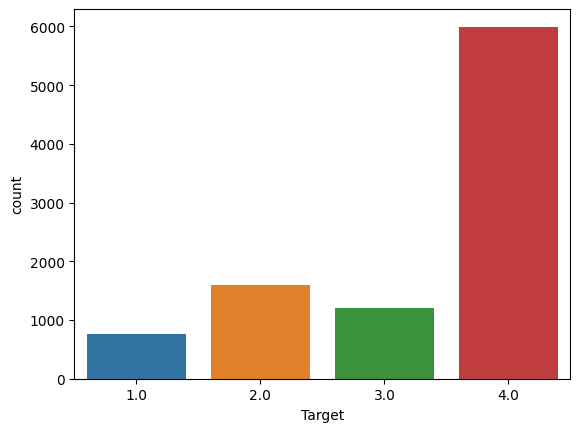

In [ ]:
df['Target'].value_counts(normalize = True)
sns.countplot(x = 'Target', data = df)

#Valores nulos

Primero, se comparan los valores nulos en 'v2a1', es decir, la cantidad que se paga de renta, con el tipo de vivienda

In [ ]:
df.drop(columns=['tipovivi'])

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,estadocivil,epared,etecho,energcocinar,eviv
0,ID_279628684,190000.0,no,3,no,si,si,no,NaN,0,...,1.000000,0.00,100.0000,1849,4.0,divorciado,Regular,Mal,Gas,Mal
1,ID_f29eb3ddd,135000.0,no,4,no,si,si,si,1.0,0,...,1.000000,64.00,144.0000,4489,4.0,divorciado,Regular,Regular,Electrico,Regular
2,ID_68de51c94,NaN,no,8,no,si,si,no,NaN,0,...,0.250000,64.00,121.0000,8464,4.0,viudo,Regular,Bien,Electrico,Bien
3,ID_d671db89c,180000.0,no,5,no,si,si,si,1.0,0,...,1.777778,1.00,121.0000,289,4.0,soltero,Bien,Bien,Electrico,Bien
4,ID_d56d6f5f5,180000.0,no,5,no,si,si,si,1.0,0,...,1.777778,1.00,121.0000,1369,4.0,union libre,Bien,Bien,Electrico,Bien
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33408,ID_a065a7cad,NaN,si,2,si,si,si,no,NaN,0,...,36.000000,0.25,33.0625,100,NaN,soltero,Mal,Mal,Electrico,Mal
33409,ID_1a7c6953b,NaN,no,3,no,si,si,no,NaN,0,...,4.000000,1.00,36.0000,2916,NaN,union libre,Bien,Bien,Gas,Bien
33410,ID_07dbb4be2,NaN,no,3,no,si,si,no,NaN,0,...,4.000000,1.00,36.0000,144,NaN,soltero,Bien,Bien,Gas,Bien
33411,ID_34d2ed046,NaN,no,3,no,si,si,no,NaN,0,...,4.000000,1.00,36.0000,144,NaN,soltero,Bien,Bien,Gas,Bien


In [ ]:
col = [i for i in df.columns if i.startswith('tipovivi')]
df.loc[:, col].sum()

tipovivi1                                                20844
tipovivi2                                                 3498
tipovivi3                                                 5652
tipovivi4                                                  597
tipovivi5                                                 2822
tipovivi     rentadarentadapropiarentadarentadarentadarenta...
dtype: object

Los valores nulos corresponden a los tipos de vivienda 1, 4 y 5. Se puede entender que estos no pagan renta debido al tipo de vivienda, por lo cual se llenan estos espacios con 0.

In [ ]:
df['v2a1']=df['v2a1'].fillna(0)

In [ ]:
df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBdependency,SQBmeaned,agesq,Target,estadocivil,epared,etecho,energcocinar,eviv,tipovivi
0,ID_279628684,190000.0,no,3,no,si,si,no,NaN,0,...,0.00,100.0000,1849,4.0,divorciado,Regular,Mal,Gas,Mal,rentada
1,ID_f29eb3ddd,135000.0,no,4,no,si,si,si,1.0,0,...,64.00,144.0000,4489,4.0,divorciado,Regular,Regular,Electrico,Regular,rentada
2,ID_68de51c94,0.0,no,8,no,si,si,no,NaN,0,...,64.00,121.0000,8464,4.0,viudo,Regular,Bien,Electrico,Bien,propia
3,ID_d671db89c,180000.0,no,5,no,si,si,si,1.0,0,...,1.00,121.0000,289,4.0,soltero,Bien,Bien,Electrico,Bien,rentada
4,ID_d56d6f5f5,180000.0,no,5,no,si,si,si,1.0,0,...,1.00,121.0000,1369,4.0,union libre,Bien,Bien,Electrico,Bien,rentada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33408,ID_a065a7cad,0.0,si,2,si,si,si,no,NaN,0,...,0.25,33.0625,100,NaN,soltero,Mal,Mal,Electrico,Mal,propia
33409,ID_1a7c6953b,0.0,no,3,no,si,si,no,NaN,0,...,1.00,36.0000,2916,NaN,union libre,Bien,Bien,Gas,Bien,propia
33410,ID_07dbb4be2,0.0,no,3,no,si,si,no,NaN,0,...,1.00,36.0000,144,NaN,soltero,Bien,Bien,Gas,Bien,propia
33411,ID_34d2ed046,0.0,no,3,no,si,si,no,NaN,0,...,1.00,36.0000,144,NaN,soltero,Bien,Bien,Gas,Bien,propia


La siguiente columna con datos faltantes es v18q1, el número de tablets en el hogar. Este se compara con v18q, que dice si el propietario posee tablets.

In [ ]:
df['v18q'][df['v18q1'].isna()].value_counts()

no    25468
Name: v18q, dtype: int64

Se puede ver que lo valores nulos corresponden solamente a hogares que no tienen tablet, por lo que simplemente se llenan con 0

In [ ]:
df['v18q1'].fillna(0, inplace=True)
df['v18q1']

0        0.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
33408    0.0
33409    0.0
33410    0.0
33411    0.0
33412    0.0
Name: v18q1, Length: 33413, dtype: float64

La siguiente columna con valores nulos es rez_esc, años atrás en la escuela. Se puede ver que solo aplican a población entre los 7 y 17 años.

In [ ]:
df['age'][df['rez_esc'].notna()].value_counts()

16    627
17    594
13    544
12    535
8     531
15    531
10    523
9     515
14    509
7     478
11    445
Name: age, dtype: int64

Los demás valores se llenan con 0

In [ ]:
df['rez_esc'].fillna(0, inplace = True)

Ahora se verifica si existen más columnas con valores faltantes

In [ ]:
list_na = df.columns[df.isna().any()].tolist()
print('Columnas con datos faltantes: ')
for i in list_na:
  if df[i].isna().sum()/len(df)<=0.05:
    print(i)

Columnas con datos faltantes: 
meaneduc
SQBmeaned


In [ ]:
df[df['meaneduc'].isna()].groupby('idhogar')['age'].max()


idhogar
03c21b43f    18
074f400ee    18
0b1d5d56e    18
1b31fd159    18
1e2fc704e    18
2e4c82ed0    19
4937daf94    19
4deb0c65e    19
519274b20    18
656185b23    18
74718009d    19
8e4c4b74b    19
90c21473b    18
a874b7ce7    18
bb7038e41    18
c31f9f3a0    17
c49af2e64    17
e197a50ea    19
f4adb7a8c    18
faaebf71a    19
Name: age, dtype: int64

In [ ]:
mapper = df[df['age'] >= 18].groupby('idhogar')['escolari'].mean().to_dict()
df['meaneduc'] = df.apply(lambda x: mapper.get('idhogar', 0) if np.isnan(x['meaneduc']) else x['meaneduc'], axis = 1)
df['meaneduc'].isna().sum()

0

In [ ]:
df['SQBmeaned'] = df['meaneduc']**2

In [ ]:
df.to_csv('CostaRicanHouseholdPovertyLevel_explored.csv', index=False)